# Обучение простейшей FC нейросети на числовых фичах

In [2]:
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
from joblib import dump
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
data = pd.read_csv(
    '../data/processed/numerical_train.csv',
    index_col = 'pair_id'
)

In [4]:
X = data.drop(['is_duplicate'], axis = 1)
y = data.is_duplicate

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 666,
    stratify = y,
    test_size = 0.2
)

In [18]:
mlp = MLPClassifier(
    learning_rate_init = 1e-2,
    max_iter = 100,
    early_stopping = True,
    validation_fraction = 0.25
)

In [19]:
# Grid of hyperparameters
mlp_grid = {
    'hidden_layer_sizes': [
        (8,8,4),
        (16,32,32,16),
        (16,32,64,64,16)
    ],
    'activation': [
        'relu',
        'logistic'
    ],
    'learning_rate': [
        'adaptive',
        'invscaling'
    ]
}

In [20]:
# Grid search of the best
# hyperparameters combination
mlp_gsearch = GridSearchCV(
    estimator = mlp,
    param_grid = mlp_grid,
    n_jobs = 3,
    verbose = 2,
    cv = 3
)

In [21]:
mlp_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Program Files\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature name

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True,
                                     learning_rate_init=0.01, max_iter=100,
                                     validation_fraction=0.25),
             n_jobs=3,
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(8, 8, 4), (16, 32, 32, 16),
                                                (16, 32, 64, 64, 16)],
                         'learning_rate': ['adaptive', 'invscaling']},
             verbose=2)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


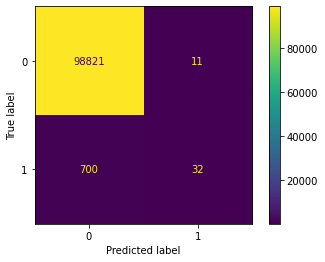

In [26]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    mlp_gsearch,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


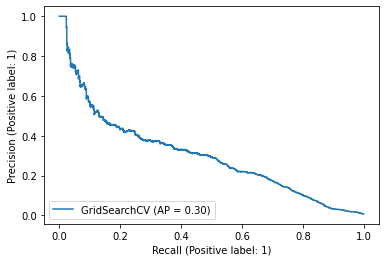

In [27]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    mlp_gsearch,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


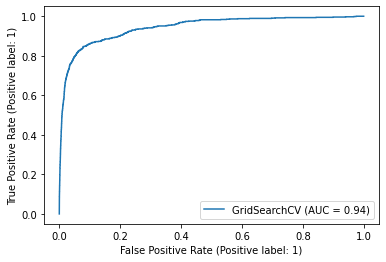

In [28]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    mlp_gsearch,
    X_test,
    y_test
)

In [29]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    mlp_gsearch.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     98832
           1       0.74      0.04      0.08       732

    accuracy                           0.99     99564
   macro avg       0.87      0.52      0.54     99564
weighted avg       0.99      0.99      0.99     99564



In [30]:
# Saving catboost model
dump(
    mlp_gsearch.best_estimator_,
    '../models/mlp.joblib'
)

['../models/mlp.joblib']